# Predicting Salary given Position

# Introduction 
Have you ever wondered how much more you would be making if you were in a more senoir position? Wonder no more. In this project, I have taken data from the one and only [Position Salary Dataset](https://www.kaggle.com/datasets/mariospirito/position-salariescsv) and will walk you through my implementation of polynomial regression to help you derive a model. 

### Goal
- Predict salary given experience in months

### Sub-Goals
- Understand how libraries like ```scikit-learn``` may implement regression
- Understand how to use ```scikit-learn``` to implement regression

## Tools
In this project, I will make use of: 
- Pandas, a library for data manipulation
- NumPy, a library for scientific computing
- Matplotlib, a library for plotting data
- scikit-learn, a library for Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor #gradient descent with sckit-learn
from sklearn.preprocessing import StandardScaler #z-score normalisation with sckit-learn

In [2]:
#read data 
data = pd.read_csv('Position_Salaries.csv')

In [3]:
# visualise data
print(data)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


We can see that as you take on more senior positions, your numerical level will increase and your salary will increase. 

In [4]:
#convert data to numpy arrays
data = data.to_numpy()

In [5]:
x_train = data[:,1] #Level
y_train = data[:,2] #Salary
y_train = y_train/1000

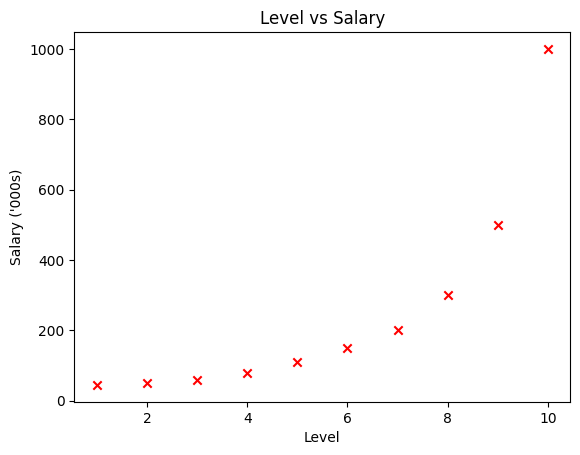

In [6]:
#plot data onto a scatter plot to visualise data
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Level vs Salary")
plt.xlabel("Level")
plt.ylabel("Salary ('000s)")

plt.show()

## Linear Regression
To get started, lets try and fit a linear function to the data set which can be represented as 
$$f_{w,b}(x) = wx + b$$
where $w$ and $b$ are parameters we are trying to find. 

#### Cost Function 
A cost function is a function that is able to give us an indication of how well our model performs. There are many different types of cost function. For this project, I will be using the *sum of squared error* as given: 

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

where $m$ represents the number of training data

In [7]:
#function that calculates the cost given all the parameters

def compute_cost(x, y, w, b):
    #number of training examples
    m = x.shape[0]

    total_cost = 0

    #getting the sum of squared errors
    for i in range(m):
        f_wb = w*x[i] + b
        cost_i = (f_wb -y[i])**2
        total_cost = total_cost + cost_i

    #dividing the summation by 2m
    total_cost = total_cost/(2*m)

    return total_cost

#### Gradient Descent
*Gradient Descent* is a method to **minimize** a cost function. 
<img align="right" src="./gradient_descent.png" style="width:200px;"/>

If you were to visualise how $J(w,b)$ looks like in relation to it's parameters $w$ and $b$, you get something like a bowl.

*Gradient Descent* works by constantly updating the parameters $w$ and $b$ so that you reach the local minimum point of a cost function. 

[Here](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/optimizing-multivariable-functions/a/what-is-gradient-descent#:~:text=Gradient%20descent%20minimizes%20differentiable%20functions,direction%20of%20the%20negative%20gradient.) for a more detailed explanation of *Gradient Descent*. 

Formula for gradient descent is as follows: 
$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value

> To get started, let's create a function that returns the derivative as shown in (2) and (3)

In [8]:
def compute_gradient(x, y, w, b): 
    
    # Number of training examples
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        dj_db_i = f_wb - y[i]
        dj_dw_i = (f_wb - y[i])*x[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
        
    return dj_dw, dj_db

> Now, let's create a function that does gradient descent using ```compute_cost``` and ```compute_gradient```

In [9]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters): 
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = w_in
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = compute_gradient(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db              
    return w, b

> Let's run the gradient descent algorithm above! 

In [10]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 10000
alpha = 0.001

w_algo,b_algo = gradient_descent(x_train ,y_train, initial_w, initial_b, alpha, iterations)
print("w,b found by gradient descent:", w_algo, b_algo)

w,b found by gradient descent: 77.3121370287372 -170.50294366292795


With our algorithm, $w = 77312.1370287372$ and $b = -170502.94366292786$. Let's try using ```Sckit-Learn```, a library that can do gradient descent for us!

In [11]:
sgdr = SGDRegressor(max_iter=10000000)

x_train = x_train.reshape(-1, 1) #reformat x_train to have 1 column. rows is determined by number of training sets. 
sgdr.fit(x_train, y_train)

w_sckit = sgdr.coef_
b_sckit = sgdr.intercept_

print("w,b found by Sckit-Learn:", w_sckit, b_sckit)
print("w,b found by my algorithm", w_algo, b_algo)

w,b found by Sckit-Learn: [69.82082655] [-108.30345066]
w,b found by my algorithm 77.3121370287372 -170.50294366292795


> The parameters given by ```Sckit-Learn``` is quite different. Let's try and visualise it!  

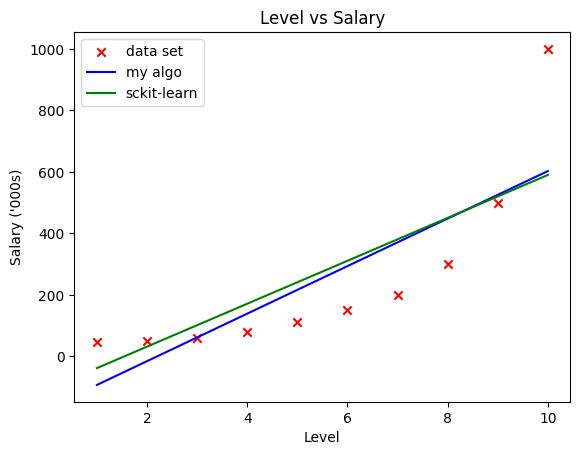

In [12]:
#convert x_train back to a 1-D Array
x_train = x_train[:,0]

#plotting
plt.scatter(x_train, y_train, marker='x', c='r', label="data set")
plt.plot(x_train, x_train*w_algo + b_algo, c='b', label="my algo")
plt.plot(x_train, x_train*w_sckit +b_sckit, c='g', label="sckit-learn")

#labelling
plt.legend(loc='upper left')
plt.title("Level vs Salary")
plt.xlabel("Level")
plt.ylabel("Salary ('000s)")
plt.show()

> A linear model cannot accurately predict the data set which explains why both algorithms, even though using the same method, give very different parameters. Let's try **Polynomial Regression** instead!

## Polynomial Regression 
#### Feature Engineering 
Suppose we use the following model for polynomial regression: 
$$y=w_0x_0 + w_1x_1^2 + w_2x_2^3+ ... + w_{15}x_{15}^{16} + b$$
We would be adding new features to our equation. 

Rather than thinking that $x^2$ is the square of $x$, think of it as a new input variable that will ultimately have some effect on the salary. It can visualised with the following equation: 

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0+w_1x_1+w_2x_2 + ...+ w_{15}x_{15}+ b $$ 
where $\mathbf{w}$ and $\mathbf{x}$ are column vectors 

#### Z-Score Normalisation 
Assuming if $x_0 = 2,  x_{15}^{16} =65536 $. From this, we can expect $w_{15}$ to be alot smaller as compared to $w_{0}$ since a change in $w_{15}$ will induce a siginficant change to the whole equation. This will create a problem while doing gradient descent because we are trying to find all the values of $w$ simultaneously. 

To prevent this problem from happening, let's first do z-score normalisation on our features. 

In [13]:
#feature engineering
x_train = x_train.reshape(-1, 1) #reformat x_train to have 1 column. rows is determined by number of training sets. 
x_train_poly = X = np.c_[x_train, x_train**2, x_train**3,x_train**4, x_train**5, x_train**6, x_train**7, 
x_train**8, x_train**9, x_train**10, x_train**11, x_train**12, x_train**13, x_train**14, x_train**15, x_train**16]

#z-score normalise data with sklearn library
scaler = StandardScaler()
x_train_poly = scaler.fit_transform(x_train_poly)

#### Same same but different formulas 
$f(\mathbf{w},b)$ can be simplified with vector dot product as:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{1} $$ 
Therefore, the new cost function is 
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{2}$$ 

> We will now implement the new cost function! 

In [14]:
#cost function as shown in (2)
def poly_compute_cost(x,y,w,b):
    #number of training sets
    m = x.shape[0]
    
    cost = 0.0
    
    for i in range(m):                                
        f_wb_i = np.dot(x[i], w) + b           
        cost = cost + (f_wb_i - y[i])**2       
    cost = cost / (2 * m)
    
    return cost

#### Gradient Descent 
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{3}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{4}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{5}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

> Let's create a function that calculates the gradient in (4) and (5)! 

In [15]:
def poly_compute_gradient(x, y, w, b): 

    m,n = x.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(x[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * x[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

> Function for gradient descent!

In [16]:
def poly_gradient_descent(x, y, w_in, b_in, alpha, num_iters): 
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = w_in  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = poly_compute_gradient(x, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
        
    return w, b

> Let's test the implementation of Gradient Descent! 

In [17]:
# initialize parameters
initial_w = np.zeros_like(x_train_poly[0])
initial_b = 0.

# some gradient descent settings
iterations = 10000
alpha = 0.0005

# run gradient descent 
w_algo_poly, b_algo_poly = poly_gradient_descent(x_train_poly, y_train, initial_w, initial_b,alpha, iterations)
print(f"w, b found by gradient descent: {w_algo_poly}, {b_algo_poly:0.2f}")

w, b found by gradient descent: [23.98971381 24.06654338 22.80716463 21.37950276 20.13566017 19.1302024
 18.33387043 17.70296519 17.198735   16.79095952 16.45707929 16.18045807
 15.94880248 15.75294627 15.58597039 15.44258055], 247.82


> let's do an implementation with ```sckit-learn```

In [18]:
sgdr = SGDRegressor(max_iter=100000000)
 
sgdr.fit(x_train_poly, y_train)

w_sckit = sgdr.coef_
b_sckit = sgdr.intercept_

print("w,b found by Sckit-Learn:", w_sckit, b_sckit)
print("w,b found by my algorithm:", w_algo_poly, b_algo_poly)

w,b found by Sckit-Learn: [24.39997028 24.77369039 23.07951681 21.17172292 19.61053267 18.46269212
 17.6589371  17.11210279 16.74892051 16.51452471 16.36961831 16.28653937
 16.24591885 16.23419273 16.24184196 16.26217202] [249.49580561]
w,b found by my algorithm: [23.98971381 24.06654338 22.80716463 21.37950276 20.13566017 19.1302024
 18.33387043 17.70296519 17.198735   16.79095952 16.45707929 16.18045807
 15.94880248 15.75294627 15.58597039 15.44258055] 247.8209830079753


> The parameters are big and messy, let's plot our results on a graph to better visualise it!  

In [19]:
def predicted_x(x, w, b):
    m = x.shape[0]
    predicted_x = []
    for i in range(m):
        predicted_x.append(np.dot(x[i],w) + b)
    return predicted_x

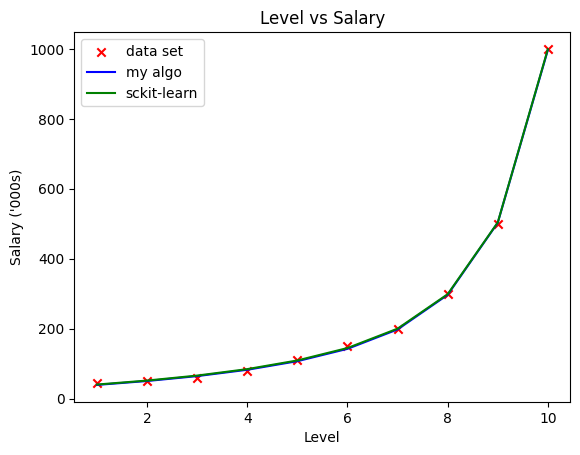

In [20]:
#convert x_train back to a 1-D Array
poly_x_train_predicted = predicted_x(x_train_poly, w_algo_poly, b_algo_poly)
poly_x_train_predicted_sckit = predicted_x(x_train_poly, w_sckit, b_sckit)

#plotting
plt.scatter(x_train, y_train, marker='x', c='r', label="data set")
plt.plot(x_train, poly_x_train_predicted, c='b', label="my algo")
plt.plot(x_train, poly_x_train_predicted_sckit, c='g', label="sckit-learn")

#labelling
plt.legend(loc='upper left')
plt.title("Level vs Salary")
plt.xlabel("Level")
plt.ylabel("Salary ('000s)")
plt.show()

#### Hooray! 
Visually, we can see that our regression model closely matches the model derived using sckit-learn. More importantly, it seems to cut through most points on the dataset which implies that it can accurately predict your salary given your level in an organisation. 

Let's test our model out and see how much more you will be making in the future. 

In [ ]:
def f_wb(level): 
    x = level
    x = np.array([x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13, x**14, x**15, x**16]) #reformat to fit feature engineered model
    predicted_income = np.dot(x, w_algo_poly) + b_algo_poly
    
    return predicted_income
    

def predict_income_increase(curr_level, fut_level):
    curr_inc = f_wb(curr_level)
    fut_inc = f_wb(fut_level)

    increase = (fut_inc - curr_inc)/curr_inc #calculate income increase in percentage
    return round(increase) #round to nearest integer

curr_level = 0.0 
fut_level = 0.0 

while (curr_level < 1 or curr_level > 10):
    try:
        curr_level = float(input("What is your current level in your organisation from a scale of 1 to 10?"))
    except:
        print("Ensure that input is a float between 1 and 10")
        
if int(curr_level) == 10:
    print("You can't earn any more than this...")
else:
    while (fut_level < curr_level or fut_level > 10):
        try:
            fut_level = float(input("Which level do you wish to be at?"))
        except:
            print("Ensure that your input is a float above your curr_level and below 10")
    
    income_increase = predict_income_increase(curr_level, fut_level)
    print(f"Work hard and you will see an income increase of {income_increase}%!")

Ensure that input is a float between 1 and 10
